In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


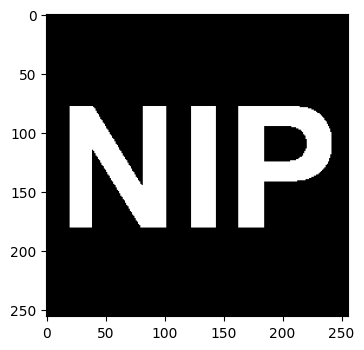

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import cv2 as cv
plt.rcParams['figure.dpi'] = 100

file_path = "/content/drive/My Drive/S2-2021 APPHY157/B2/Convolution/"
fname = "NIP.bmp"
Img = skimage.io.imread(file_path+fname)
plt.imshow(Img, cmap='gray')
plt.show()

In [4]:
N = 256
x = np.linspace(-1,1,N)
y = x
X,Y = np.meshgrid(x,y)

#function that creates a circle image
def aperture(radius):
  R = np.sqrt(X**2 +Y**2)
  Ap = np.zeros(np.shape(R))
  Ap[np.where(R<radius)] = 1.0
  
  # save image
  Apimg = Ap/ Ap.max()
  Apimg = Apimg* 255
  #cv.imwrite(f"{file_path}aperture{str(radius)}.bmp", Apimg)

  return Ap

In [18]:
#function that performs convolution
def convolution(radius):
  A = aperture(radius) 
  Ashift = np.fft.fftshift(A)
  FImg = np.fft.fft2(Img)
  H = Ashift*FImg
  h = np.fft.ifft2(H)

  plt.subplot(121)
  plt.imshow(A, cmap='gray')
  plt.subplot(122)
  plt.imshow(abs(h), cmap='gray')
  plt.show()
  #cv.imwrite(f"{file_path}NIPconv{str(radius)}.bmp", abs(h))

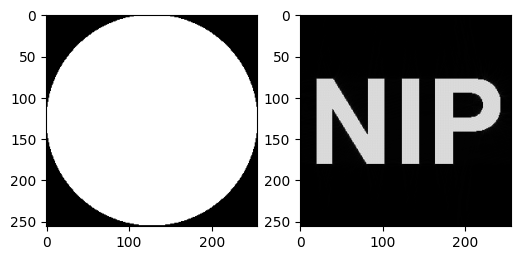

In [19]:
convolution(1)

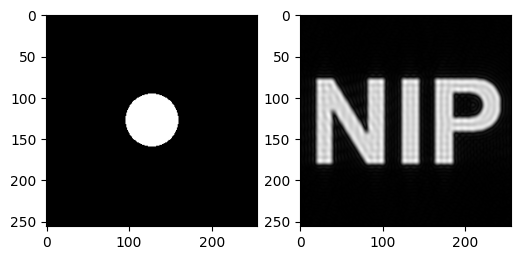

In [20]:
convolution(0.25)


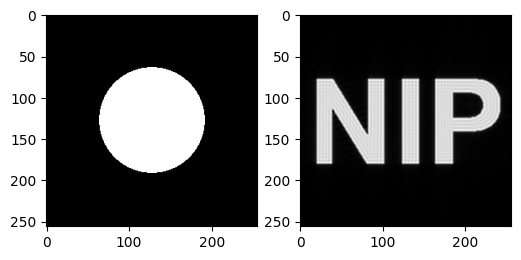

In [21]:
convolution(0.5)

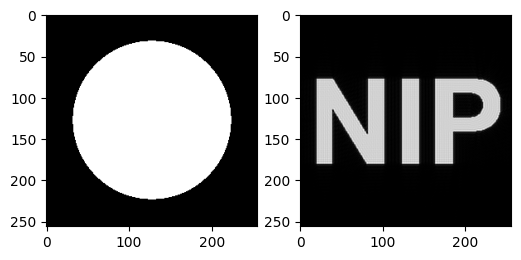

In [22]:
convolution(0.75)